In [1]:
import matplotlib.pyplot as plt
import json
import sys
sys.path.append("/scratch/colemanr/emit-ghg/")
from reanalysis_products import *

In [2]:
meta_path = "/scratch/brodrick/methane/ch4_plumedir/previous_manual_annotation_oneback.json"

with open(meta_path, 'r') as f: 
    meta = json.loads(f.read())
meta_df = pd.json_normalize(meta['features'])

In [3]:
out_list = []
for i in range(len(meta_df))[0:10]: 
    
    fid = meta_df['properties.fids'][i][0]
    plume_id = meta_df['properties.Plume ID'][i]
    
    try: 
        pseudo_o  = json.loads(meta_df['properties.Psuedo-Origin'][i])["coordinates"]
        plume_lat = pseudo_o[1]
        plume_lon = pseudo_o[0]
        
        u10_hrrr, u10_hrrr_stddev, u10_era5, u10_era5_stddev, u10_ecmwf, u10_ecmwf_stddev = get_u10_reanalysis(fid, plume_lat, plume_lon)
        out_list.append([fid, plume_id, u10_hrrr, u10_hrrr_stddev, u10_era5, u10_era5_stddev, u10_ecmwf, u10_ecmwf_stddev])        
        
    except Exception as e: ## Skip EMIT plume complexes missing pseudo-origin info 
        print(plume_id, e)
        pass

CH4_PlumeComplex-9 Expecting value: line 1 column 1 (char 0)


In [4]:
emit_wind_df = pd.DataFrame(out_list, columns=['FID', 'plume_id',
                                               'u10_hrrr_m_per_s', 'u10_hrrr_stddev_m_per_s',
                                               'u10_era5_m_per_s', 'u10_era5_stddev_m_per_s', 
                                               'u10_ecmwf_m_per_s', 'u10_ecmwf_stddev_m_per_s'])
                                                                           
emit_wind_df.head()

,FID,plume_id,u10_hrrr_m_per_s,u10_hrrr_stddev_m_per_s,u10_era5_m_per_s,u10_era5_stddev_m_per_s,u10_ecmwf_m_per_s,u10_ecmwf_stddev_m_per_s
0,emit20230620t084426,CH4_PlumeComplex-0,NaN,NaN,1.848655,0.169136,2.176112,0.608987
1,emit20230620t084426,CH4_PlumeComplex-1,NaN,NaN,2.327866,0.324203,2.465670,0.349156
2,emit20230620t084426,CH4_PlumeComplex-2,NaN,NaN,2.748739,0.595089,2.821657,0.541719
3,emit20230620t084414,CH4_PlumeComplex-3,NaN,NaN,1.767024,0.369238,1.957944,0.722500
4,emit20230620t084414,CH4_PlumeComplex-4,NaN,NaN,1.766951,0.369227,2.232277,0.758182


## Testing

In [57]:
## Non-US EMIT example
fid = 'emit20240205t051601'
obs_path, loc_path =get_cluster_paths(fid)
plume_lat = 38.626965407645265
plume_lon = 79.04122939150994

## US EMIT example 
fid = 'emit20240405t170129'
obs_path, loc_path =get_cluster_paths(fid)
plume_lat = 38.30271036053194
plume_lon = -96.13240860251196


Using HRRR reanalysis
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Apr-05 17:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Apr-05 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


('hrrr', 0.9342307277324597, 0.05789812005927058)

In [13]:
av3_path = '/scratch/colemanr/av3/controlled_release_23/nr_tifs'

## 2024
plume_lat=33.963108
plume_lon=-117.336191

## 2023
plume_lon=-117.336353 
plume_lat=33.963269

out_list = []
for file in glob.glob(os.path.join(av3_path, '*CH4_ORT_nr.tif')):
    fid = os.path.basename(file).split('_')[0]
    print(fid)
    obs_path, loc_path = get_cluster_paths(fid)

AV320231114t210551
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 21:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 22:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
AV320231114t200855
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 20:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 21:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
AV320231114t214401
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 21:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 22:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
AV320231114t202658
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 20:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 21:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
AV320231114t213904
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 21:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Nov-14 22:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
AV320231114t211

## AV3 controlled release reanalysis plots

In [35]:
av3_path = '/scratch/colemanr/av3/controlled_release_24/nr_tifs'
obs_path = '/store/av3/y24/rdn/ort/'

## 2024
plume_lat=33.963108
plume_lon=-117.336191

# ## 2023
# plume_lon=-117.336353 
# plume_lat=33.963269

## TODO: Checking to see if plume lat/lon is in US (for HRRR, otherwise use Open-Meteo "best match" option)
    # Fill HRRR with NaN for plumes out of location 

out_list = []

for file in glob.glob(os.path.join(av3_path, '*CH4_ORT_nr.tif')):
    name = os.path.basename(file).split('_')[0]
    
    print(name)
    
    # Find (row,col) in AV3 image that correspond to CH4 release location 
    loc_name = name + '_L1B_ORT_main_c9f44ce5_LOC_ORT.hdr'
    loc_ds = envi.open(envi_header(os.path.join(obs_path,loc_name))).open_memmap(interleave='bil')[:,0:2,:]
    lon_cond = np.abs(loc_ds[:,0,:] - plume_lon)
    lat_cond = np.abs(loc_ds[:,1,:] - plume_lat)
    matched = np.unravel_index(np.argmin(lon_cond + lat_cond), lon_cond.shape)
    
    # Extract time from obs file at (row,col)
    obs_name = name + '_L1B_ORT_main_c9f44ce5_OBS_ORT.hdr'
    obs_ds = envi.open(envi_header(os.path.join(obs_path,obs_name))).open_memmap(interleave='bip')
    
    # Round fractional hours since UTC midnight
    frac_time = obs_ds[matched[0],matched[1],9]
    acq_time_pre = int(np.floor(frac_time))
    acq_time_post = int(np.ceil(frac_time))
    
    # TODO: Check to see if pre/post time puts you into different day
    hour_rounded_pre = str(acq_time_pre) + ':00:00'
    hour_rounded_post = str(acq_time_post) + ':00:00'
    date = name[3:7] + '-' + name[7:9] + '-' + name[9:11]
    
    # Extract hourly wind data before and after AV3 acquisition
    hrrr_u10_avg_pre, hrrr_u10_std_pre = herbie_hrrr(plume_lat, plume_lon%360, date, hour_rounded_pre, model = "hrrr")
    era5_u10_avg_pre, era5_u10_std_pre = open_meteo_era5(plume_lat, plume_lon, date, hour_rounded_pre, model = "era5_seamless")
    ecmwf_u10_avg_pre, ecmwf_u10_std_pre = open_meteo_era5(plume_lat, plume_lon, date, hour_rounded_pre, model = "ecmwf_ifs")
    
    hrrr_u10_avg_post, hrrr_u10_std_post = herbie_hrrr(plume_lat, plume_lon%360, date, hour_rounded_post, model = "hrrr")
    era5_u10_avg_post, era5_u10_std_post = open_meteo_era5(plume_lat, plume_lon, date, hour_rounded_post, model = "era5_seamless")
    ecmwf_u10_avg_post, ecmwf_u10_std_post = open_meteo_era5(plume_lat, plume_lon, date, hour_rounded_post, model = "ecmwf_ifs")
    
    # Linearly interpolate windspeed based on acquisition time 
    hrrr_u10_avg_int = np.interp(frac_time, [acq_time_pre, acq_time_post], [hrrr_u10_avg_pre, hrrr_u10_avg_post])
    hrrr_u10_std_int = np.interp(frac_time, [acq_time_pre, acq_time_post], [hrrr_u10_std_pre, hrrr_u10_std_post])
    
    era5_u10_avg_int = np.interp(frac_time, [acq_time_pre, acq_time_post], [era5_u10_avg_pre, era5_u10_avg_post])
    era5_u10_std_int = np.interp(frac_time, [acq_time_pre, acq_time_post], [era5_u10_std_pre, era5_u10_std_post])

    ecmwf_u10_avg_int = np.interp(frac_time, [acq_time_pre, acq_time_post], [ecmwf_u10_avg_pre, ecmwf_u10_avg_post])
    ecmwf_u10_std_int = np.interp(frac_time, [acq_time_pre, acq_time_post], [ecmwf_u10_std_pre, ecmwf_u10_std_post])
    
    out_list.append([name, 
                     hrrr_u10_avg_int, hrrr_u10_std_int,
                     era5_u10_avg_int, era5_u10_std_int,
                     ecmwf_u10_avg_int, ecmwf_u10_std_int])

AV320240422t225842
(14793, 1421, 11)
(14775, 856)


KeyboardInterrupt: 

In [38]:
## Plotting/extract unique values
wind_df = pd.DataFrame(out_list, columns=['FID', 
                                          'u10_hrrr_m_per_s', 'u10_stddev_hrrr_m_per_s',
                                          'u10_era5_m_per_s', 'u10_stddev_era5_m_per_s',
                                          'u10_ecmwf_m_per_s', 'u10_stddev_ecmwf_m_per_s'])

wind_df.sort_values(by=['FID'], inplace=True)


#### Append new FIDs to existing reanalysis csv 
fname = '/scratch/colemanr/plume_emission_rate/AV3_reanalysis.csv'

# TODO: check to see if fname exists and if not initialize empty file with column names 


original_df = pd.read_csv(fname)
original_df = original_df[['FID', 'u10_hrrr_m_per_s', 'u10_stddev_hrrr_m_per_s', 'u10_era5_m_per_s', 'u10_stddev_era5_m_per_s', 'u10_ecmwf_m_per_s', 'u10_ecmwf_hrr_m_per_s']]

## Export abridged wind pdf with only variables from Jay's sheet 
wind_df = wind_df[['FID', 'u10_hrrr_m_per_s', 'u10_stddev_hrrr_m_per_s', 'u10_era5_m_per_s', 'u10_stddev_era5_m_per_s', 'u10_ecmwf_m_per_s', 'u10_ecmwf_hrr_m_per_s']]

merged = pd.concat((original_df, wind_df)).drop_duplicates('FID')
merged.to_csv(fname)

EmptyDataError: No columns to parse from file

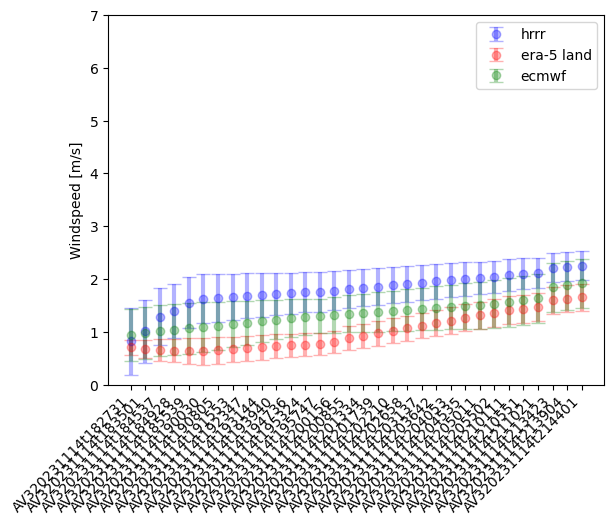

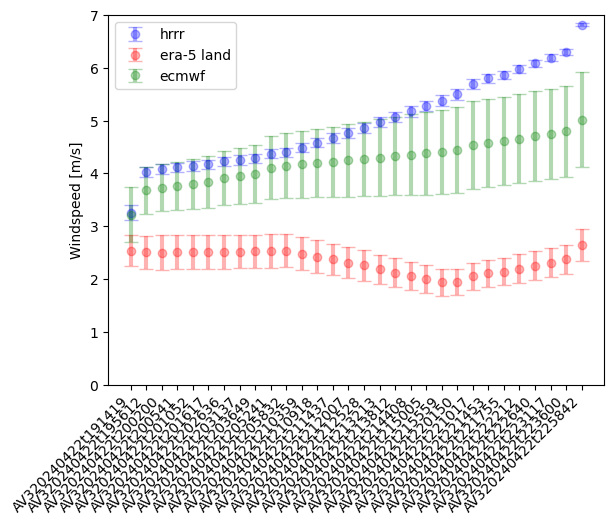